In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#récupérer les tweets brut
data_brut= '/content/drive/MyDrive/Colab Notebooks/raw_1milliontweet.txt'
with open(data_brut, "r") as file:
    lines_brut = file.readlines()
    
data_full = [line.split() for line in lines_brut]

In [ ]:
#récupérer les tweets nettoyés
clean_data= '/content/drive/MyDrive/Colab Notebooks/clean_1milliontweet.txt'
with open(clean_data, "r") as file:
    lines = file.readlines()
    
clean_full = [line.split() for line in lines]

In [ ]:
# transformer en dataframe
data = pd.DataFrame(lines_brut, columns = ['tweet'])

In [ ]:
print(len(data['tweet']))

658132


In [ ]:
print(data.tweet)

0                                                        \n
1                                                       🥺\n
2                                                🥳🥳🥳🥳🏃‍♂️\n
3                                                       !\n
4                                                      !!\n
                                ...                        
658127    【自動】→ C'est Mademoiselle Hortense qui est dans...
658128    ⠀⠀⠀⠀⠀⠀⠀⠀⠀©! 自然⠀by 𝘃𝗼𝗴𝘂𝗲𝗽𝗹𝗲𝘂𝗿𝘀.⠀⠀⠀𝗻𝗼𝘁𝗲𝘀 1 oƒ 3 ...
658129    花見 ✧ ৶ ⋄ 𖧧 ;〘18.11 ࿁ 09:30〙 ༘✶ ⋆｡ 𝖮𝗅𝗂𝗏𝗂𝖺’𝗌 𝖲𝗉𝖺...
658130    金玉 : testicules soit : or + bijou/joyau (ou ba...
658131    #魈空 #xiaoaether Zombie AU https://t.co/zb4n87C...
Name: tweet, Length: 658132, dtype: object


In [ ]:
data['clean_twt']= lines

In [ ]:
data.head(20)

In [ ]:
!pip install gensim==4.0
!pip install python-Levenshtein

In [ ]:
from gensim.models import KeyedVectors

In [ ]:
# récupérer les embeddings entrainés sur nos données
w2v = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/w2vec_model_d300_1M')

In [ ]:
import numpy as np

In [ ]:
#encode un message
def encode(msg):
    return np.mean([w2v[word] for word in msg if word in w2v] or [np.zeros(300)], axis = 0)

In [ ]:
w2v.similar_by_word("sale")

[('sal', 0.6782066822052002),
 ('pvte', 0.629138708114624),
 ('mèrde', 0.6162537336349487),
 ('pute', 0.6096962094306946),
 ('pte', 0.6044666767120361),
 ('clochard', 0.6014346480369568),
 ('slp', 0.6004031896591187),
 ('crasseux', 0.5957321524620056),
 ('puent', 0.5908592939376831),
 ('daronn', 0.5900101661682129)]

In [ ]:
%%time
#encodage des données pour créer le jeu de données
dataset_encoded = np.array([encode(msg) for msg in clean_full])

CPU times: user 29.5 s, sys: 1.88 s, total: 31.4 s
Wall time: 31.5 s


In [ ]:
%%time
from sklearn.ensemble import IsolationForest
# definir le modèle ainsi que ses paramètres
clf=IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
# Entrainer le modèle
clf.fit(dataset_encoded)

CPU times: user 8min 22s, sys: 10.5 s, total: 8min 32s
Wall time: 4min 30s


In [ ]:
%%time
# faire des prédictions sur nos données
pred = clf.predict(dataset_encoded)

CPU times: user 2min 21s, sys: 5.75 s, total: 2min 27s
Wall time: 2min 26s


In [ ]:
# rajouter une colonne dans le dataframe
data['pred']= pred

In [ ]:
data.head(20)

,tweet
0,\n
1,🥺\n
2,🥳🥳🥳🥳🏃‍♂️\n
3,!\n
4,!!\n
5,📸ー #KUN ➥ 171121 ; INSTAGRAM Kun a posté sur s...
6,⠀⠀⠀⠀ ⠀ ┄ー 𝐋𝐨𝐮𝐢𝐬𝐨𝐢𝐱 𝐋𝐞𝐯𝐞𝐢𝐥𝐥𝐞𝐮𝐫’𝐬 𝐋𝐞𝐠𝐚𝐜𝐲 ー┄⠀⠀⠀ ⠀...
7,📸ー #SUNGCHAN ➥ 141121 ; SNSMC Sungchan à Inkig...
8,📸ー #TAEYONG➥ 171121 ; INSTAGRAM Taeyong a post...
9,📰 ー #TEN ➥ 181121 ; SNS Ten sera sur la couver...


In [ ]:
#localiser les outliers dans le dataframe
outliers=data['tweet'].loc[data['pred']==-1]
outlier_index=list(outliers.index)
data['pred'].value_counts()

 1    618400
-1     39732
Name: pred, dtype: int64

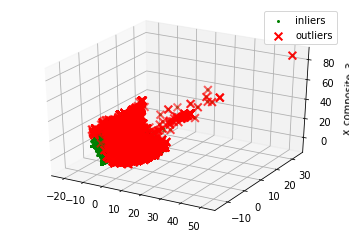

CPU times: user 47.7 s, sys: 7.39 s, total: 55.1 s
Wall time: 40.2 s


In [ ]:
# Visulaliser les outliers 3 dimensions
%%time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(dataset_encoded)
X_reduce = pca.fit_transform(X)

fig = plt.figure()
figsize=(12, 12,12)
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

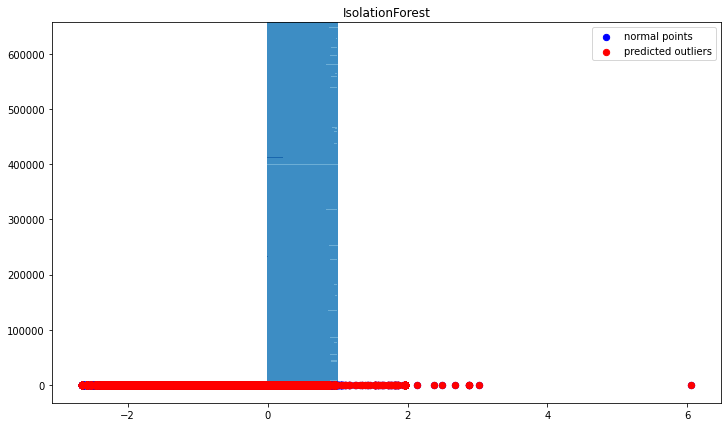

CPU times: user 34.8 s, sys: 5.14 s, total: 39.9 s
Wall time: 35.9 s


In [ ]:
# Visulaliser les outliers 2 dimensions
%%time
pca = PCA(2)
pca.fit(dataset_encoded)


res=pd.DataFrame(pca.transform(dataset_encoded))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [ ]:
outliers.head()

12          $$$$ gros chèque de paie tous les deux...\n
13                              $$$$TF esse tribunal?\n
14                                $$$ 2.5t market cap\n
15    $$ bonus change $$ #SuperMarioMaker2 #Nintendo...
16                        $0.50-$0.70 range possible?\n
Name: tweet, dtype: object

On remarque que les outliers sont des tweets  contenant les mots dollars , des mots en coréen

In [ ]:
with open("outliers.txt", 'w') as f:
  for line in outliers:
    f.write(line)